----------------------------------------------------------------
 ### **0. Data Ingestion, Preliminary Data Analysis**
 ---------------------------------------------------------------

In [1]:
# %%capture
# %pip install seaborn matplotlib

In [2]:
# importing all necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
# reading the red wine csv_file and separating with a ;
red_wine = pd.read_csv("winequality-white.csv", sep=';')

In [4]:
# previewing the first 5 rows
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# checking teh column names in the data
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# checking the numerical columns of the data
num_features = red_wine.select_dtypes(include=["int64", "float64"]).columns
num_features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# getting the description of the numerical column and transposing the data
red_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [8]:
# checking thge number of unique values
red_wine.quality.unique(
    
)

array([6, 5, 7, 8, 4, 3, 9])

| Numeric | Category   | Meaning               |
| ------- | ---------- | --------------------- |
| 3–4     | **Low**    | Poor quality wines    |
| 5–6     | **Medium** | Average/typical wines |
| 7–8+    | **High**   | Premium-quality wines |


In [9]:
# function to map aand determine the red_wine quality
def map_quality_category(x):
    if x<= 4:
        return "Low"
    elif x >= 6:
      return "Medium"
    else:
        return "High"

In [10]:
# applying the function 
red_wine["quality_label"] = red_wine["quality"].apply(map_quality_category)

In [11]:
# checking the new column adddes
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [12]:
# making a copy of the data to continue analysis
red_data = red_wine.copy()
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,High
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Medium


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [13]:
def univariate_numerical(red_data,column):
    """
    Performs univariate EDA on a single numerical columns.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot
    """
    
    print(f"Feature: {column}")
    print("="*40)
    print(red_data[column].describe().to_frame())
    print(f"\nSkewness: {red_data[column].skew():.3f}")
    print(f"Kurtosis:{red_data[column].kurt():.3f}")
    
    
    plt.figure(figsize = (12, 4))
    
    # histogram + KDE
    plt.subplot(1, 2,1)
    sns.histplot(red_data[column], kde=True, bins = 30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize = 13)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
       # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=red_data[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(red_data[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(red_data[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648
Kurtosis:2.172


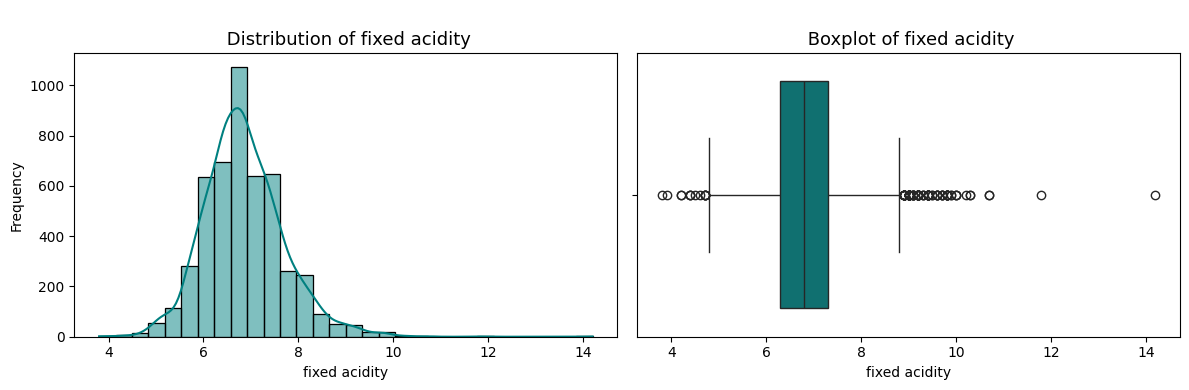

fixed acidity is moderately skewed.


In [14]:
univariate_numerical(red_data,"fixed acidity")

Feature: pH
                pH
count  4898.000000
mean      3.188267
std       0.151001
min       2.720000
25%       3.090000
50%       3.180000
75%       3.280000
max       3.820000

Skewness: 0.458
Kurtosis:0.531


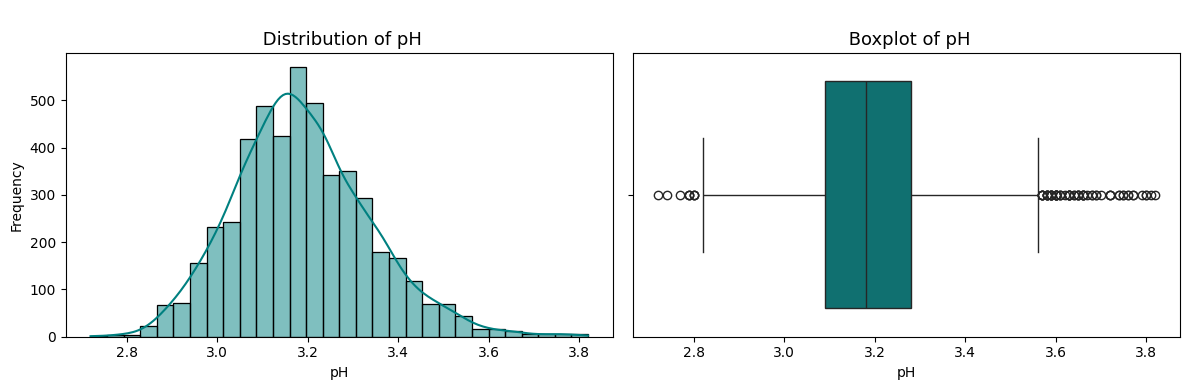

pH is fairly symmetric.


In [15]:
univariate_numerical(red_data,"pH")

In [16]:
# looping through all the column to save time

Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648
Kurtosis:2.172


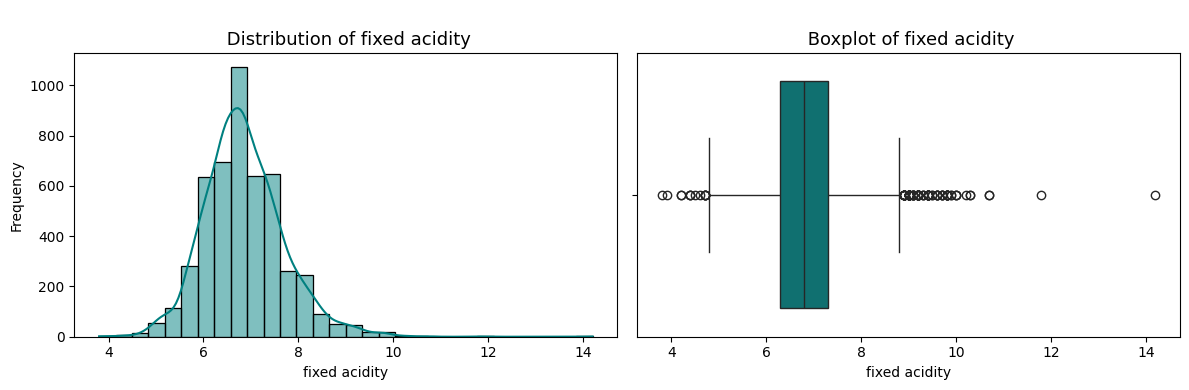

fixed acidity is moderately skewed.
Feature: volatile acidity
       volatile acidity
count       4898.000000
mean           0.278241
std            0.100795
min            0.080000
25%            0.210000
50%            0.260000
75%            0.320000
max            1.100000

Skewness: 1.577
Kurtosis:5.092


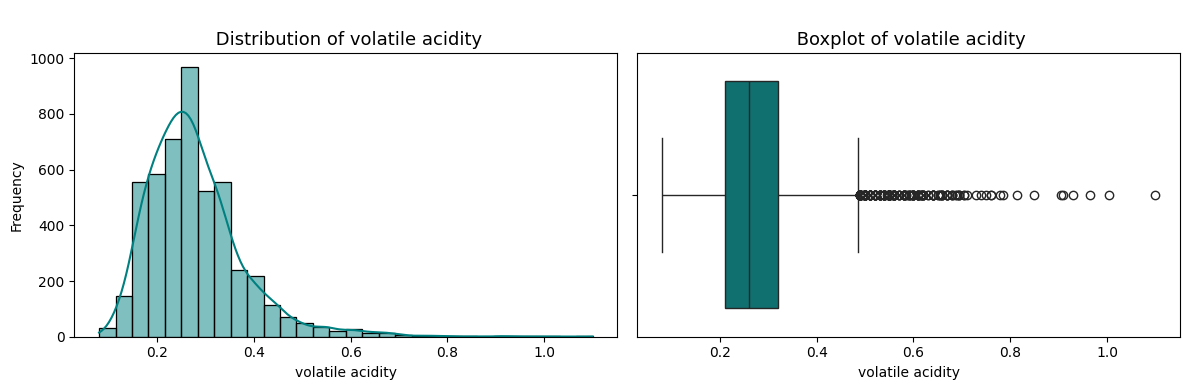


 volatile acidity is highly skewed. Consider log or Box-Cox transformation.
Feature: citric acid
       citric acid
count  4898.000000
mean      0.334192
std       0.121020
min       0.000000
25%       0.270000
50%       0.320000
75%       0.390000
max       1.660000

Skewness: 1.282
Kurtosis:6.175


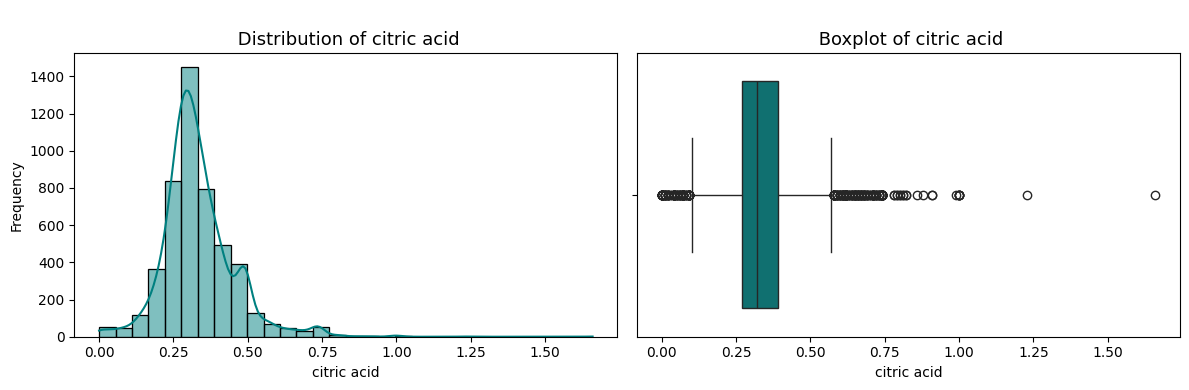


 citric acid is highly skewed. Consider log or Box-Cox transformation.
Feature: residual sugar
       residual sugar
count     4898.000000
mean         6.391415
std          5.072058
min          0.600000
25%          1.700000
50%          5.200000
75%          9.900000
max         65.800000

Skewness: 1.077
Kurtosis:3.470


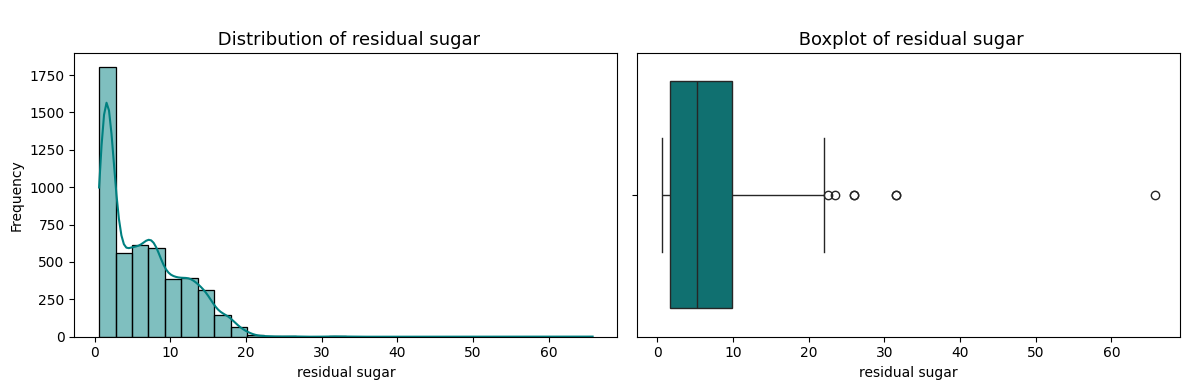


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
Feature: chlorides
         chlorides
count  4898.000000
mean      0.045772
std       0.021848
min       0.009000
25%       0.036000
50%       0.043000
75%       0.050000
max       0.346000

Skewness: 5.023
Kurtosis:37.565


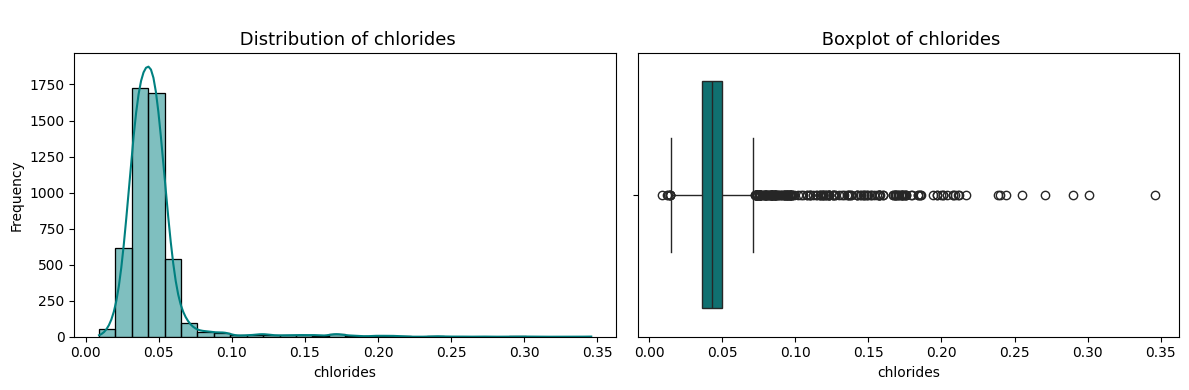


 chlorides is highly skewed. Consider log or Box-Cox transformation.
Feature: free sulfur dioxide
       free sulfur dioxide
count          4898.000000
mean             35.308085
std              17.007137
min               2.000000
25%              23.000000
50%              34.000000
75%              46.000000
max             289.000000

Skewness: 1.407
Kurtosis:11.466


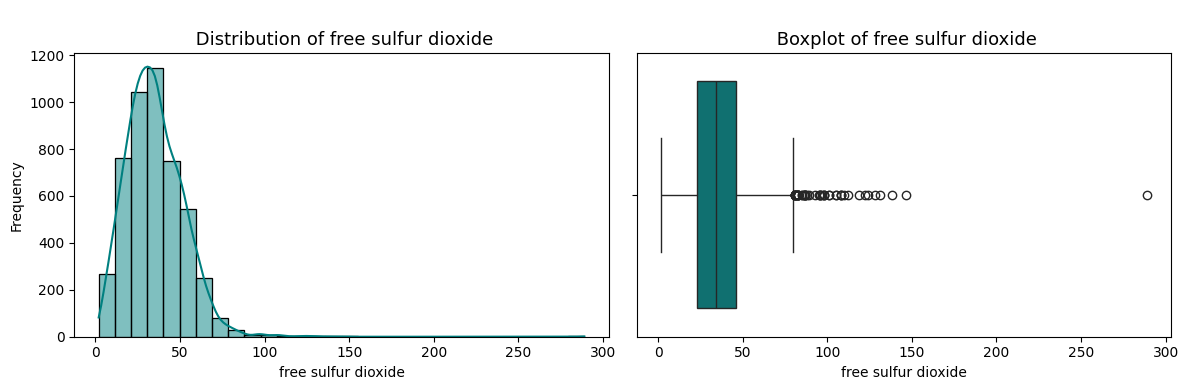


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: total sulfur dioxide
       total sulfur dioxide
count           4898.000000
mean             138.360657
std               42.498065
min                9.000000
25%              108.000000
50%              134.000000
75%              167.000000
max              440.000000

Skewness: 0.391
Kurtosis:0.572


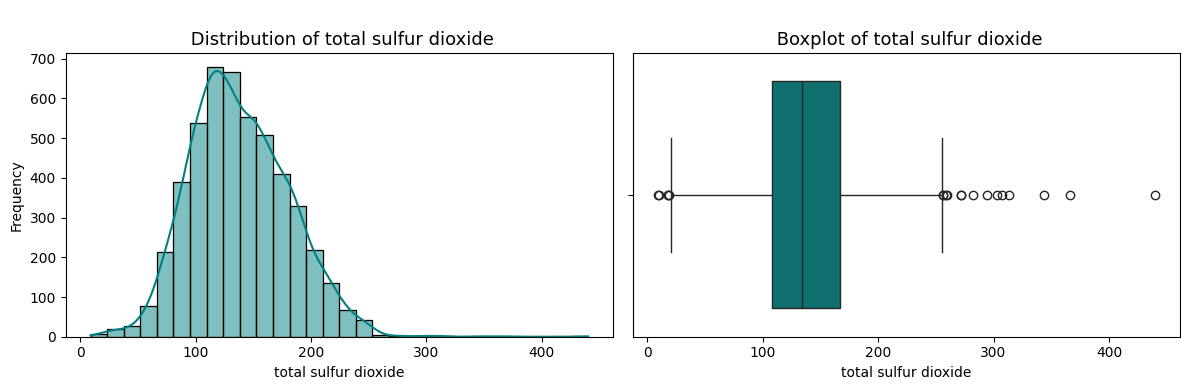

total sulfur dioxide is fairly symmetric.
Feature: density
           density
count  4898.000000
mean      0.994027
std       0.002991
min       0.987110
25%       0.991723
50%       0.993740
75%       0.996100
max       1.038980

Skewness: 0.978
Kurtosis:9.794


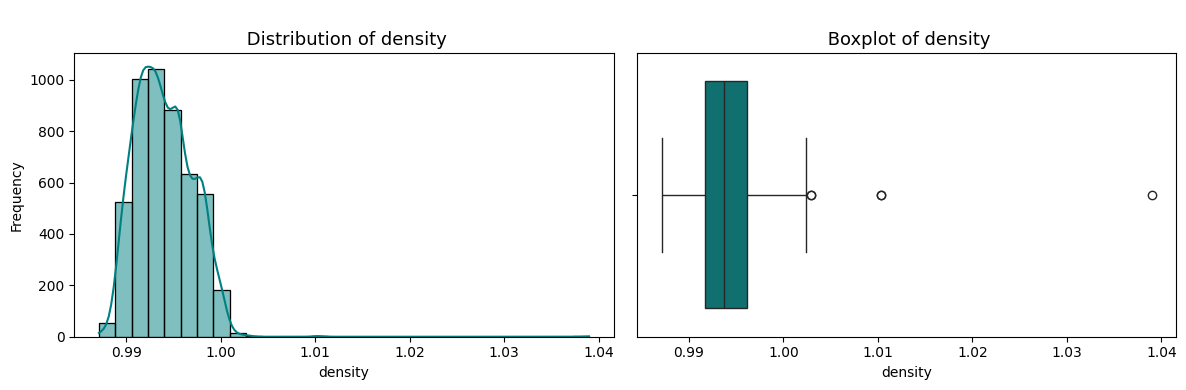

density is moderately skewed.
Feature: pH
                pH
count  4898.000000
mean      3.188267
std       0.151001
min       2.720000
25%       3.090000
50%       3.180000
75%       3.280000
max       3.820000

Skewness: 0.458
Kurtosis:0.531


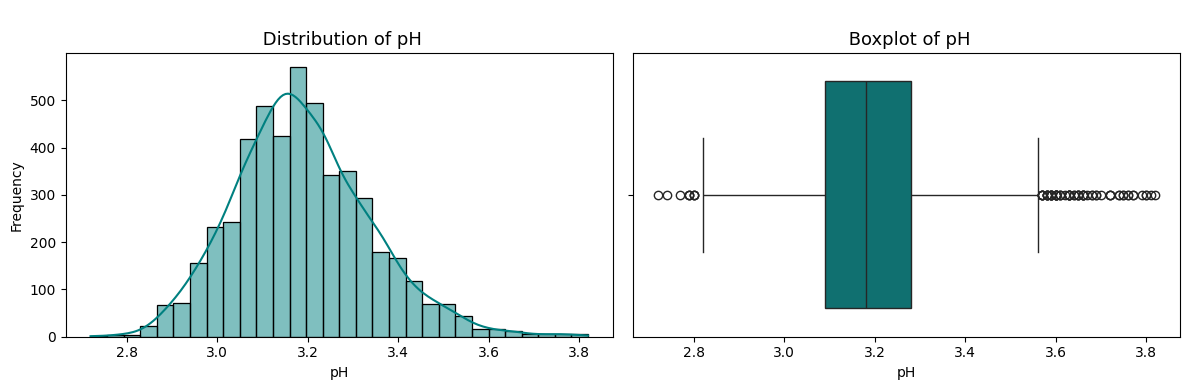

pH is fairly symmetric.
Feature: sulphates
         sulphates
count  4898.000000
mean      0.489847
std       0.114126
min       0.220000
25%       0.410000
50%       0.470000
75%       0.550000
max       1.080000

Skewness: 0.977
Kurtosis:1.591


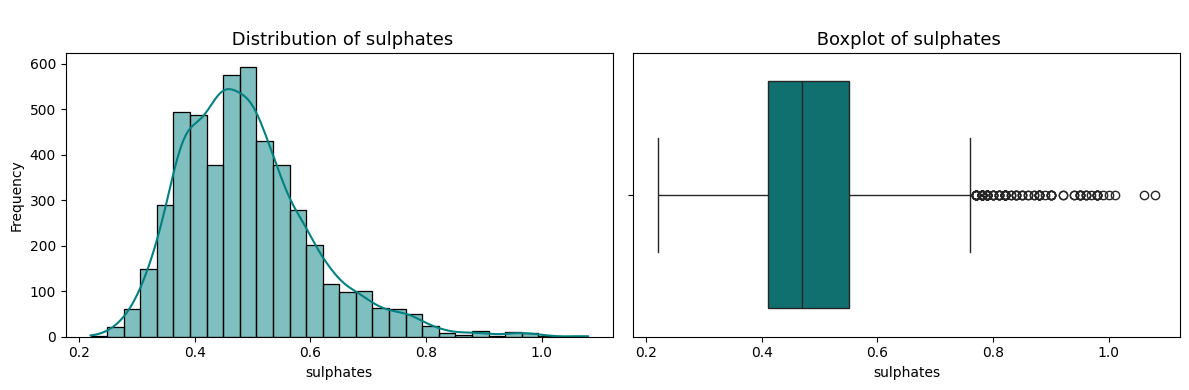

sulphates is moderately skewed.
Feature: alcohol
           alcohol
count  4898.000000
mean     10.514267
std       1.230621
min       8.000000
25%       9.500000
50%      10.400000
75%      11.400000
max      14.200000

Skewness: 0.487
Kurtosis:-0.698


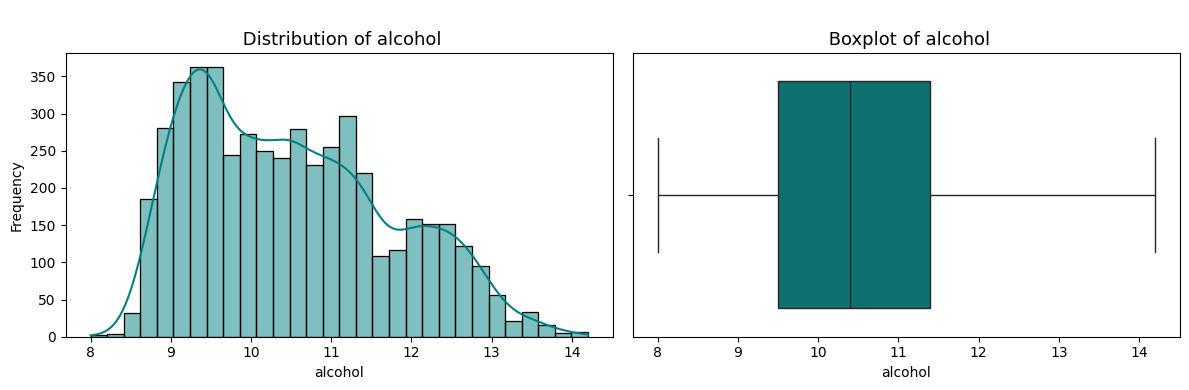

alcohol is fairly symmetric.
Feature: quality
           quality
count  4898.000000
mean      5.877909
std       0.885639
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

Skewness: 0.156
Kurtosis:0.217


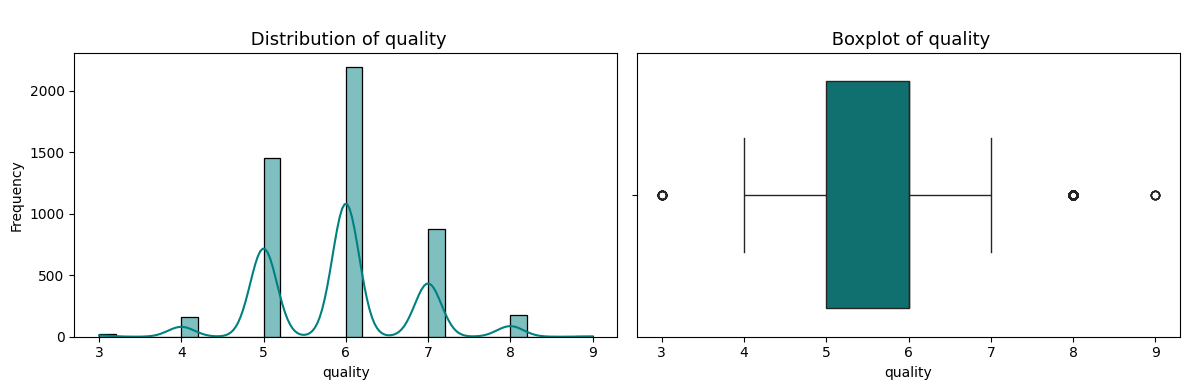

quality is fairly symmetric.


In [17]:
for col in num_features:
    univariate_numerical(red_data, col)

In [18]:

def univariate_categorical_eda(red_data, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = red_data[column].value_counts()
    prop =red_data[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=red_data, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(red_data[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


In [19]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [20]:

red_wine["quality_label"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium          3258       66.52
High            1457       29.75
Low              183        3.74



C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\2392250638.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=red_data, palette='Set2', order=freq.index,color='teal')


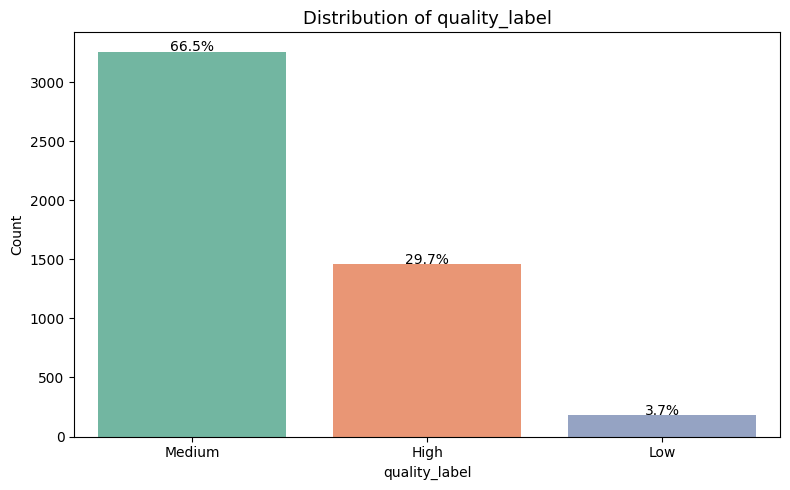

In [21]:
univariate_categorical_eda(red_wine,"quality_label" )

**Key Univariate Findings**

| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`volatile acidity`**           | Often slightly right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |



**Lets start our bivariate analysis**

We can go about it this way, for the sake of simplicity

| Level                      | Focus                        | Techniques / Tools                                   |
| -------------------------- | ---------------------------- | ---------------------------------------------------- |
| **1. Numeric–Numeric**     | Correlation and scatterplots | `.corr()`, `sns.heatmap()`, `sns.scatterplot()`      |
| **2. Numeric–Categorical** | Feature vs `quality_label`   | `sns.boxplot()`, `sns.violinplot()`, group summaries |



In [22]:
num_features = red_wine.select_dtypes(include=["int64", "float64"]).columns

In [23]:
# convert to dataframe

num_features = pd.DataFrame(red_wine[num_features])
num_features.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


1. Numeric to Numeric

Correlation with target

In [24]:
def correlation_with_target(red_data, target_col, figsize =(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # keeping only numeric columns
    numeric_data = red_data.select_dtypes(include = "number").copy()
    if target_col not in numeric_data.columns:
        raise ValueError(f"Target column'{target_col}' must be numeric and present in the dataframe.")
    corrs = numeric_data.corrwith(numeric_data[target_col]).drop(target_col)
    
    corrs_df = corrs.to_frame(name="corr").T
    
    plt.figure(figsize = figsize)
    sns.heatmap(
        corrs_df,
        annot = True,
        fmt=".3f",
        cmap = "coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws={"orientation":"vertical", "shrink": 0.7}
    )
    
    plt.xticks(rotation = 45, ha="right")
    plt.yticks([0], [target_col], rotation = 0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize = 12)
    plt.tight_layout()
    plt.show()
    
    # return sortes correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending = False).index)

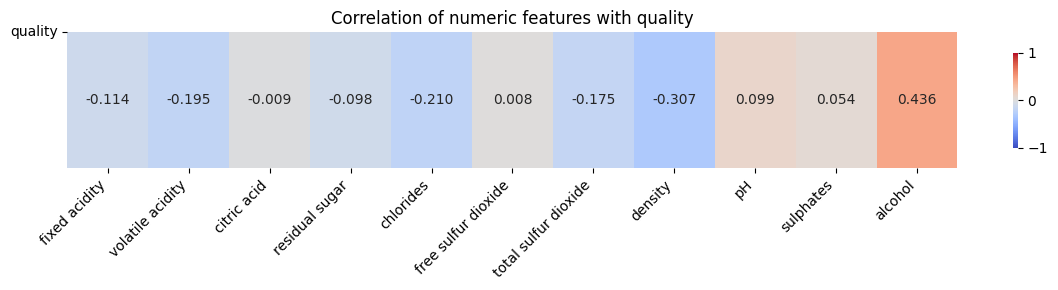

alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
dtype: float64


In [25]:
corr_series= correlation_with_target(red_data, "quality", figsize =(12,3))
print(corr_series)

| Feature                  | Correlation | Interpretation                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **alcohol**              | +0.48       | Strongest positive — higher alcohol → higher quality. Likely a key predictive feature.              |
| **volatile acidity**     | −0.39       | Strong negative — too much volatility (vinegar-like taste) reduces quality. Very important feature. |
| **sulphates**            | +0.25       | Moderate positive — contributes to stability and aroma. Helpful but secondary predictor.            |
| **citric acid**          | +0.23       | Slightly positive — adds freshness; balanced wines score higher.                                    |
| **total sulfur dioxide** | −0.19       | Too much preservation reduces quality.                                                              |
| **density**              | −0.17       | Lower density wines (lighter, less sugar) tend to score higher.                                     |
| **chlorides**            | −0.13       | Saltier taste lowers quality.                                                                       |
| **fixed acidity**        | +0.12       | Minor positive — balanced acidity helps.                                                            |
| **pH**                   | −0.06       | Weak negative; higher pH (less acidic) slightly lowers quality.                                     |
| **free sulfur dioxide**  | −0.05       | Minimal linear relationship.                                                                        |
| **residual sugar**       | +0.01       | Negligible — sweetness isn’t driving quality here.                                                  |


**How does this help our model**

| Action                                                     | Explanation                                                                                              |
| ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Keep alcohol, volatile acidity, sulphates, citric acid** | Strong predictors. You’ll definitely include them.                                                       |
| **Be cautious with total sulfur dioxide & density**        | Moderate effect; consider non-linear relationships or transformations.                                   |
| **Residual sugar, free SO₂**                               | Probably drop unless domain reasoning suggests otherwise.                                                |
| **Interactions to test:**                                  | `alcohol * acidity`, `citric acid * sulphates`, or `density * pH` — may capture subtle combined effects. |


In [26]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(red_data, x_col,y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
    #calculating the correlation coefficient
    corr, p_value = pearsonr(red_data[x_col],red_data[y_col]) 

    # create plot
    plt.figure(figsize = (8,5))
    sns.regplot(data= red_data, x=x_col, y=y_col, scatter_kws={"alpha": 0.5}, line_kws={"color":"red"})

    # title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation:{corr:.3f} (p={p_value:.3f})", fontsize = 13)
    plt.xlabel(x_col, fontsize = 11)
    plt.ylabel(y_col, fontsize = 11)
    plt.grid(alpha=0.3)
    plt.show()
    

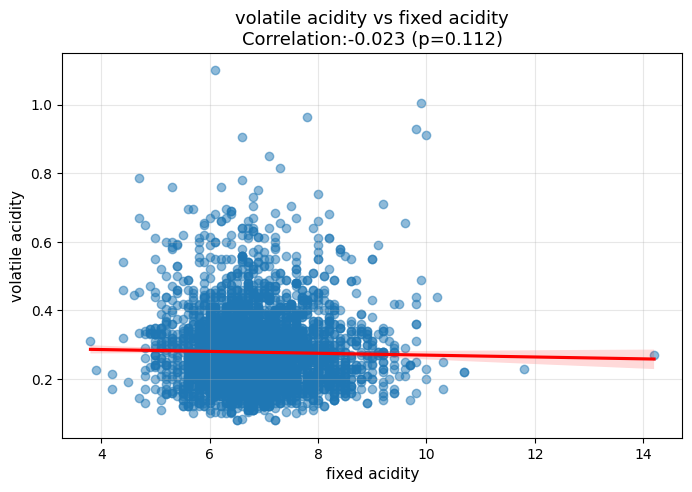

In [27]:
numeric_bivariate_plot(red_data, 'fixed acidity', 'volatile acidity')

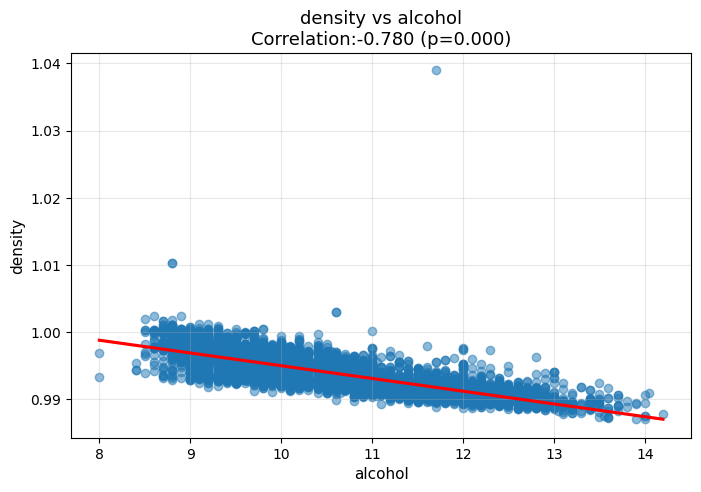

In [28]:
numeric_bivariate_plot(red_data, 'alcohol', 'density')

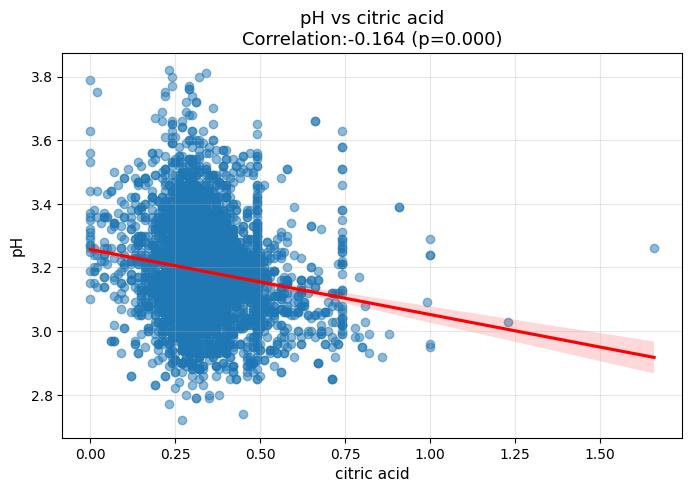

In [29]:
numeric_bivariate_plot(red_data, 'citric acid', 'pH')

**Task**
Answer the following questions
1. Run for the rest of the features

2. After each plot, ask

- Does the red regression line slope upward or downward?

- Are points tightly packed around the line or scattered widely?

- Are there outliers pulling the line?


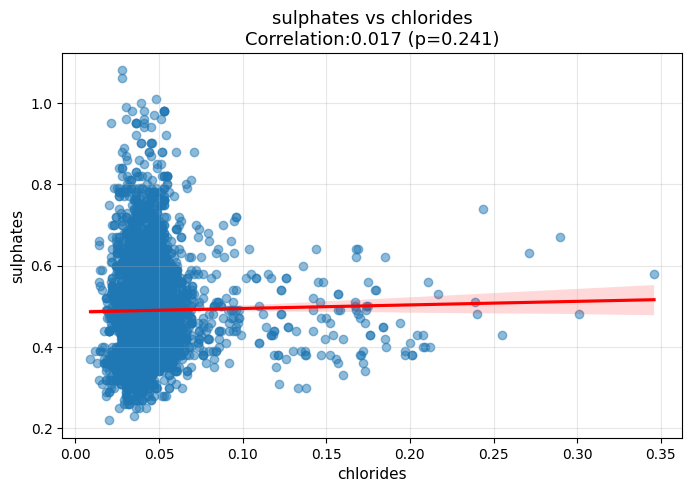

In [30]:
numeric_bivariate_plot(red_data, 'chlorides', 'sulphates')

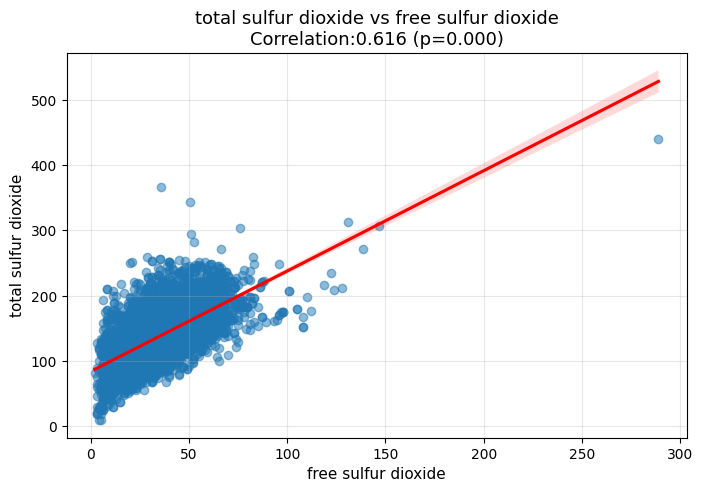

In [31]:
numeric_bivariate_plot(red_data, 'free sulfur dioxide', 'total sulfur dioxide')

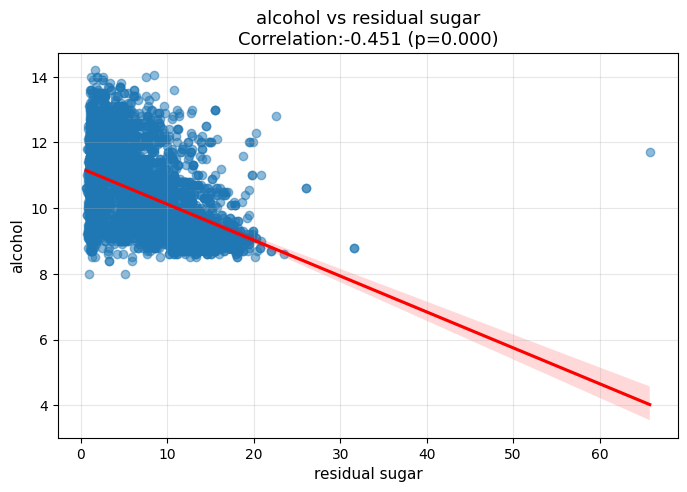

In [32]:
numeric_bivariate_plot(red_data, 'residual sugar', 'alcohol')

**Numeric–Categorical (Feature vs Target)**

In [33]:
def bivariate_num_cat(red_data, feature, target = "quality_label"):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f"Feature:{feature} vs {target}")
    print("=" * 50)
    
    # group summary
    summary = red_data.groupby(target)[feature].describe()[["mean", 'std',"min","max"]]
    print(summary)
    
    # boxplot + mean line
    sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")
    plt.title(f"{feature} across {target} categories",fontsize = 13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    
    
    # violin plot for distribution shape
    plt.figure(figsize = (10, 5))
    sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")
    plt.title(f"{feature} distribution by {target}", fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    

In [34]:
red_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

Feature:fixed acidity vs quality_label
                   mean       std  min   max
quality_label                               
High           6.933974  0.838433  4.5  10.3
Low            7.180874  1.171885  4.2  11.8
Medium         6.801059  0.817327  3.8  14.2


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


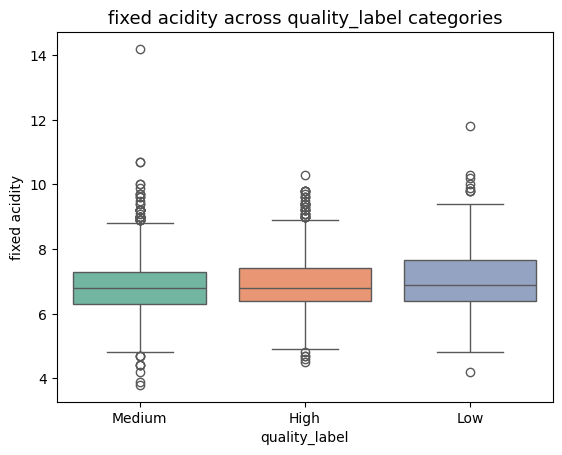

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


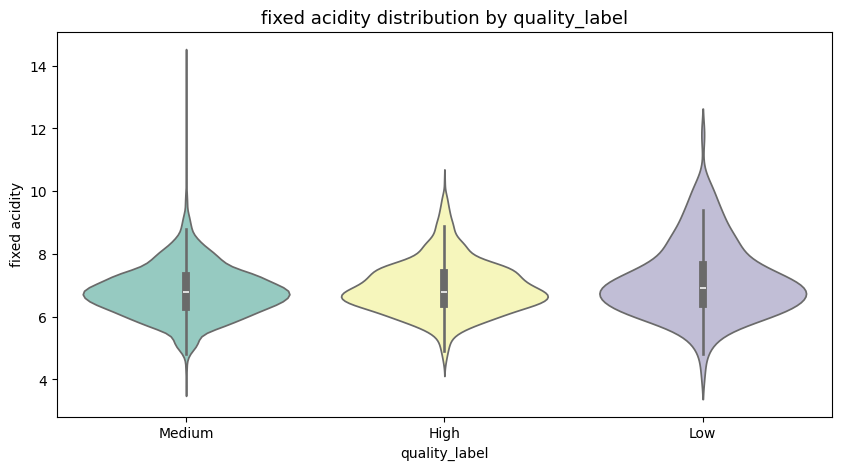

In [35]:
bivariate_num_cat(red_wine, "fixed acidity", target='quality_label')

Feature:fixed acidity vs quality_label
                   mean       std  min   max
quality_label                               
High           6.933974  0.838433  4.5  10.3
Low            7.180874  1.171885  4.2  11.8
Medium         6.801059  0.817327  3.8  14.2


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


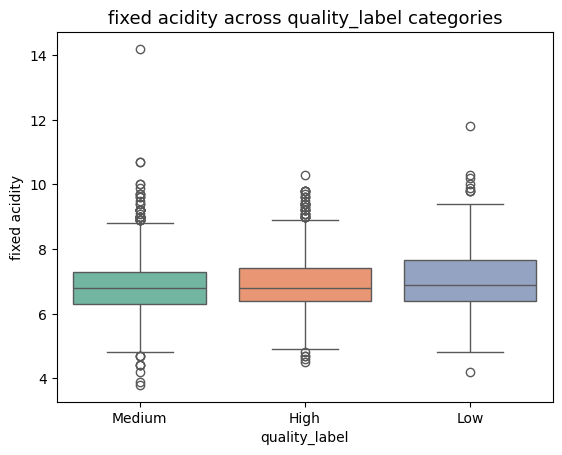

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


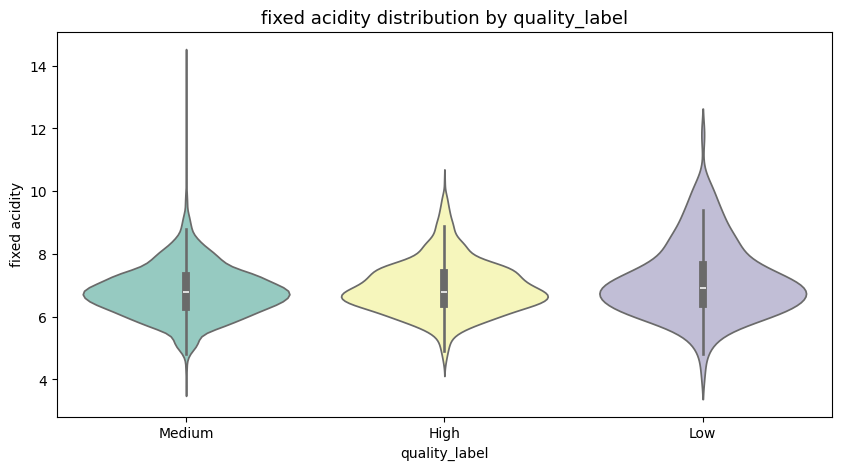

Feature:volatile acidity vs quality_label
                   mean       std   min    max
quality_label                                 
High           0.302011  0.100066  0.10  0.905
Low            0.375984  0.170525  0.11  1.100
Medium         0.262121  0.090136  0.08  0.965


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


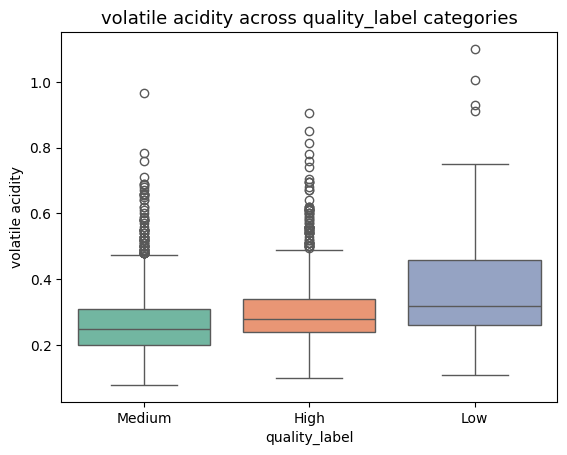

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


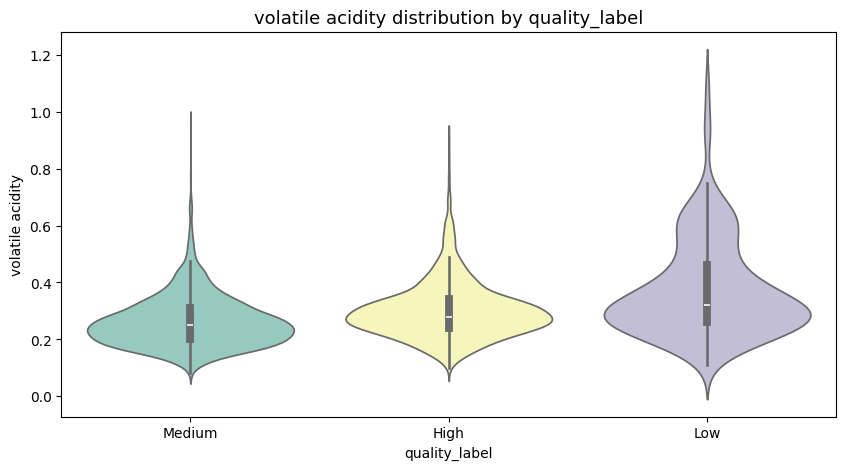

Feature:citric acid vs quality_label
                   mean       std  min   max
quality_label                               
High           0.337653  0.140814  0.0  1.00
Low            0.307705  0.157131  0.0  0.88
Medium         0.334131  0.108314  0.0  1.66


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


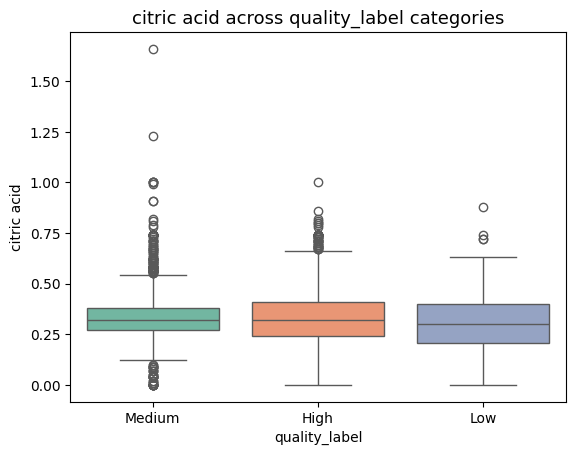

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


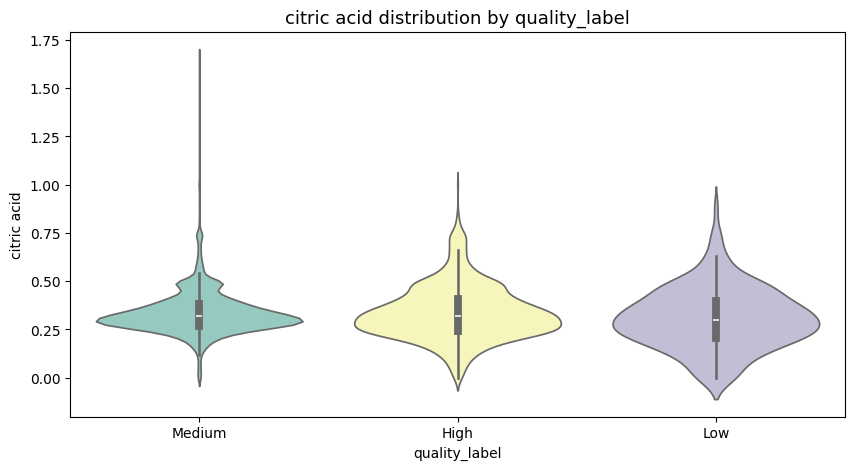

Feature:residual sugar vs quality_label
                   mean       std  min    max
quality_label                                
High           7.334969  5.327619  0.6  23.50
Low            4.821038  4.322845  0.7  17.55
Medium         6.057658  4.929353  0.7  65.80


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


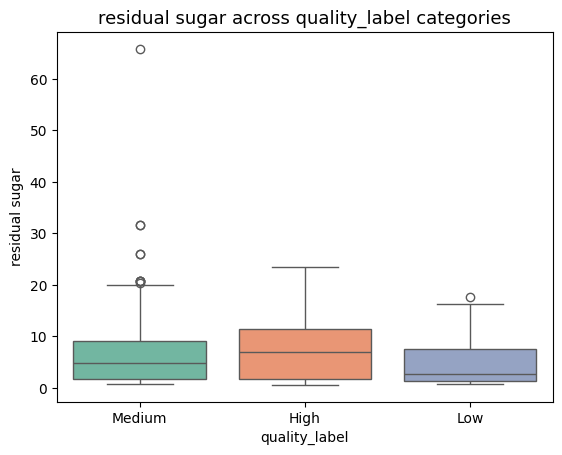

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


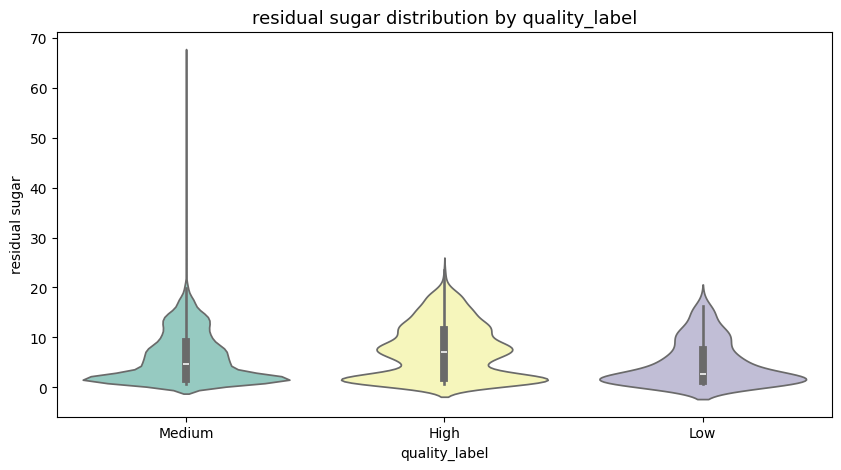

Feature:chlorides vs quality_label
                   mean       std    min    max
quality_label                                  
High           0.051546  0.026496  0.009  0.346
Low            0.050557  0.028700  0.013  0.290
Medium         0.042921  0.018262  0.012  0.255


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


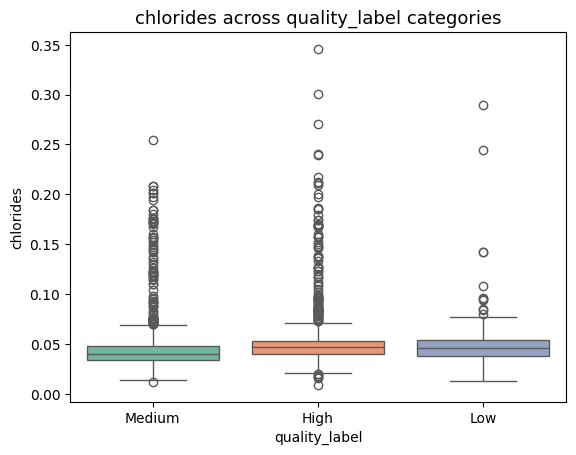

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


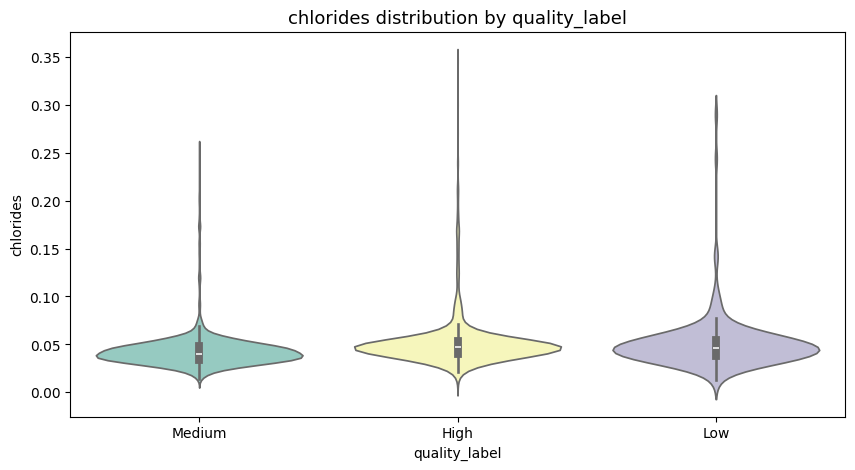

Feature:free sulfur dioxide vs quality_label
                    mean        std  min    max
quality_label                                  
High           36.432052  18.145991  2.0  131.0
Low            26.633880  31.001858  3.0  289.0
Medium         35.292664  15.138910  3.0  112.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


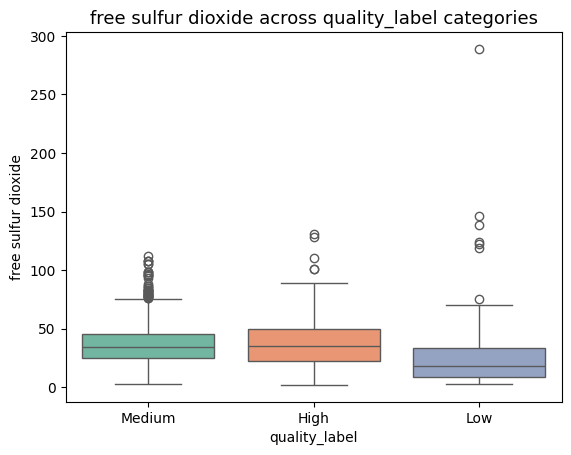

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


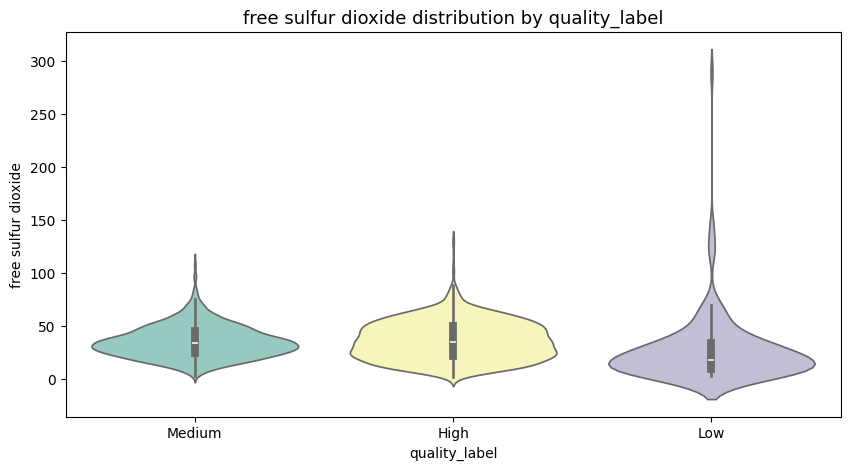

Feature:total sulfur dioxide vs quality_label
                     mean        std   min    max
quality_label                                    
High           150.904598  44.086187   9.0  344.0
Low            130.232240  62.373163  10.0  440.0
Medium         133.207489  39.097152  18.0  294.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


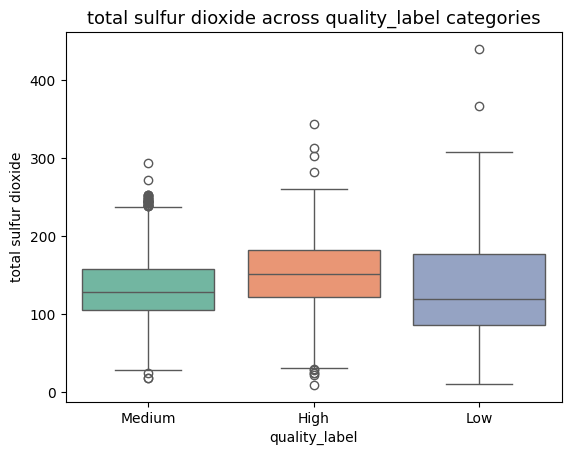

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


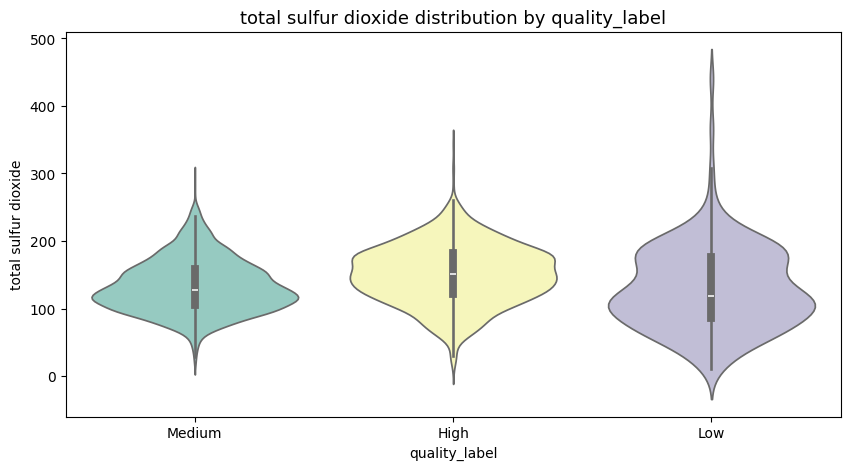

Feature:density vs quality_label
                   mean       std      min      max
quality_label                                      
High           0.995263  0.002545  0.98722  1.00241
Low            0.994343  0.002504  0.98920  1.00040
Medium         0.993457  0.003032  0.98711  1.03898


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


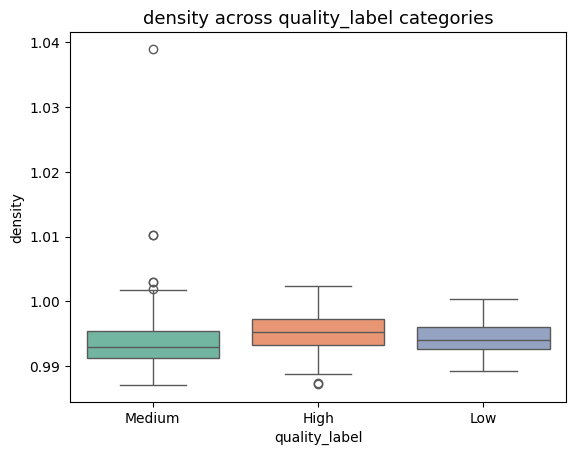

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


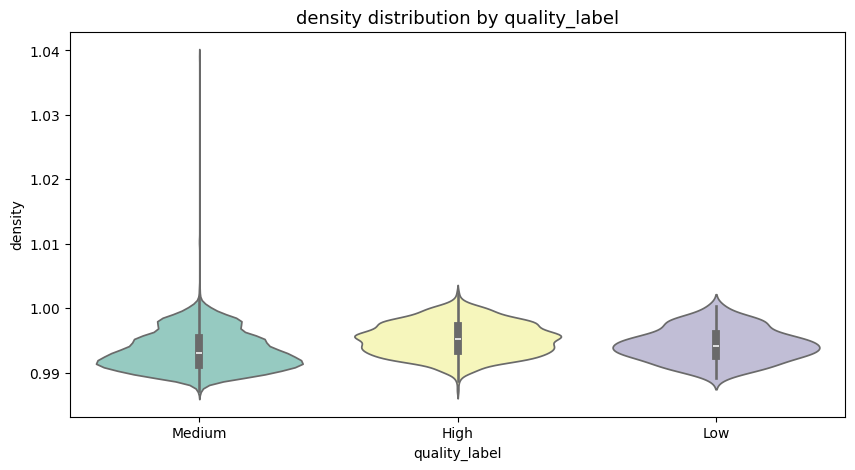

Feature:pH vs quality_label
                   mean       std   min   max
quality_label                                
High           3.168833  0.140895  2.79  3.79
Low            3.183388  0.168668  2.83  3.72
Medium         3.197231  0.153517  2.72  3.82


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


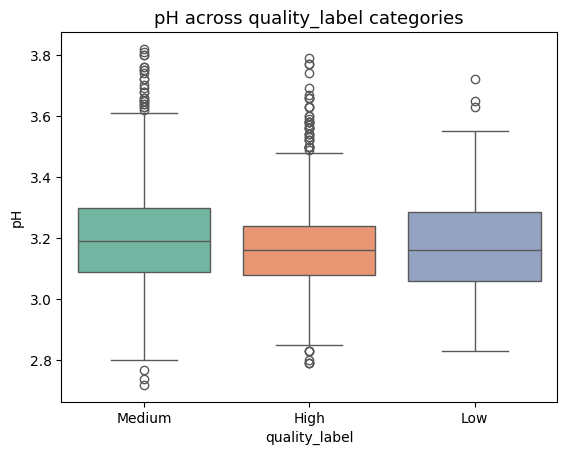

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


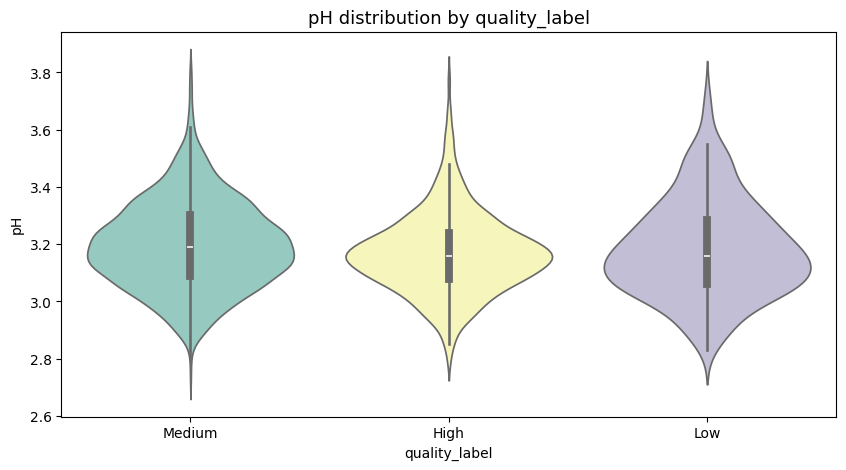

Feature:sulphates vs quality_label
                   mean       std   min   max
quality_label                                
High           0.482203  0.098205  0.27  0.88
Low            0.475956  0.117847  0.25  0.87
Medium         0.494045  0.120171  0.22  1.08


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


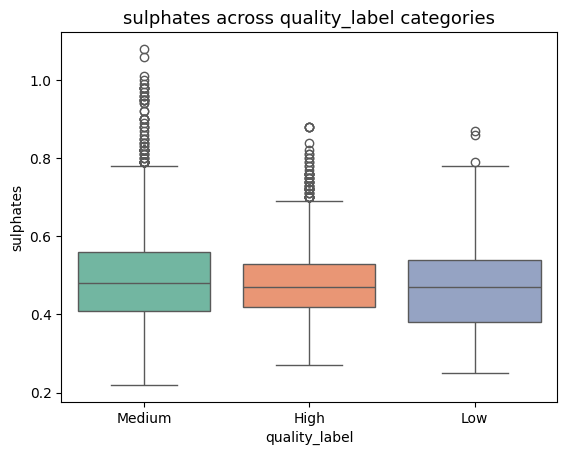

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


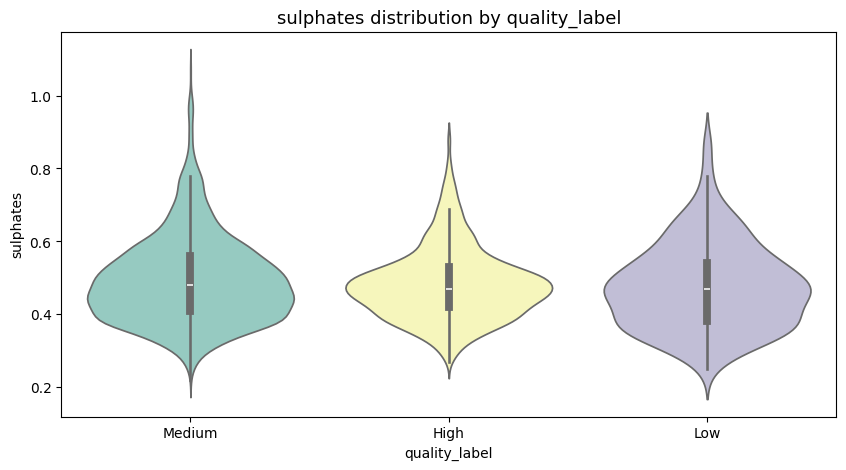

Feature:alcohol vs quality_label
                    mean       std  min   max
quality_label                                
High            9.808840  0.847065  8.0  13.6
Low            10.173497  1.027570  8.0  13.5
Medium         10.848880  1.247434  8.5  14.2


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


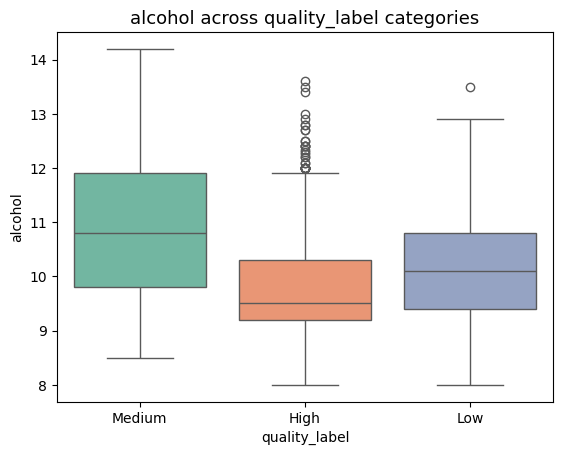

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


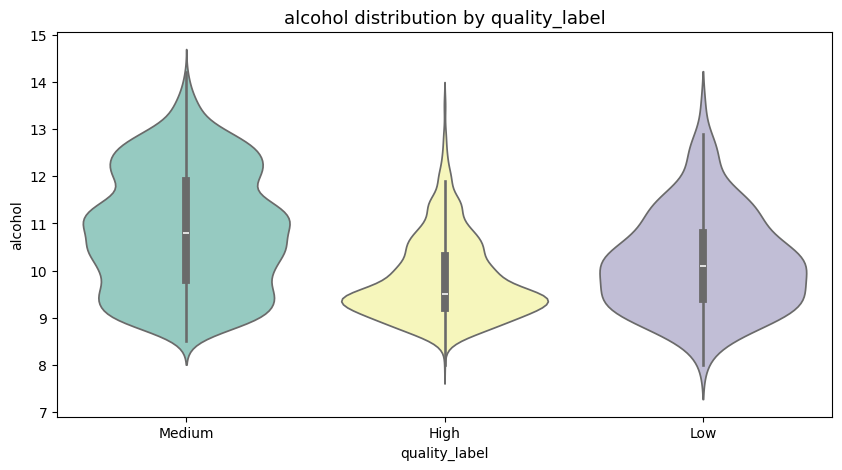

Feature:quality vs quality_label
                   mean       std  min  max
quality_label                              
High           5.000000  0.000000  5.0  5.0
Low            3.890710  0.312858  3.0  4.0
Medium         6.382136  0.594014  6.0  9.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


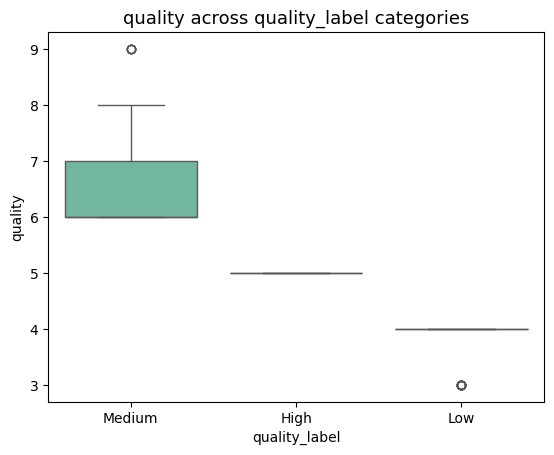

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_12872\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


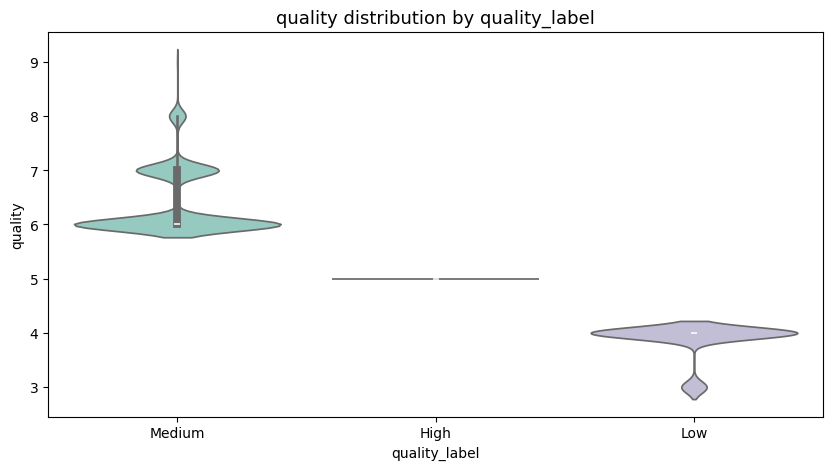

In [36]:
# lets apply our function using loops
for col in num_features:
    bivariate_num_cat(red_wine, col, target='quality_label')

**Median trend in the boxplot**

The median fixed acidity increases slightly from Low to Medium to High quality wines. This suggests that wines with higher fixed acidity tend to have better quality (up to a point).

**Distribution trend in the violin plot**

The violin plot shows how fixed acidity is distributed across Low, Medium, and High quality wines.

- The High-quality wines have a wider and slightly higher concentration of fixed acidity values around 8–10, suggesting that better wines often contain moderately higher acidity levels.

- The Medium-quality wines show a tight, dense cluster around 7–8, meaning most wines in this group share similar acidity levels.

- The Low-quality wines also cluster near 7, but their distribution is narrower, showing less variation in acidity.

In summary, the shape of the violins shows that while acidity tends to increase with wine quality, there is considerable overlap between categories — indicating that acidity alone may not be enough to distinguish wine quality perfectly.